In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import gc
import lightgbm as lgb
import xgboost as xgb

In [2]:
train_path = '/home/zhangyong/Documents/data/kaggle/santander_value/train.csv'
test_path = '/home/zhangyong/Documents/data/kaggle/santander_value/test.csv'

In [3]:
#methods
def rmsle(predicted, real):
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5


In [4]:
dat = pd.read_csv(train_path)
test = pd.read_csv(test_path)
y = dat['target']
X = dat.drop(['ID', 'target'], axis=1)
X = X.apply(lambda x: np.log1p(1+x)).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
# model = linear_model.LinearRegression()
clf = tree.DecisionTreeRegressor()
gb = GradientBoostingRegressor(verbose=2)
abr = AdaBoostRegressor()
xgb = XGBRegressor()
rmsle_score = make_scorer(rmsle, greater_is_better=False)
# clf.fit(X_train, y_train)
score = cross_val_score(xgb, X, y.values, cv = 3, scoring=rmsle_score)

In [37]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
out = pd.DataFrame(test, columns=['ID'])
out['target'] = xgb.predict(test.drop(['ID'], axis=1).apply(lambda x: np.log1p(1+x)).values)

In [41]:
predict = xgb.predict(X_test)

In [172]:
rmsle(predict, y_test.values)

1.8715745407224902

In [21]:
out.to_csv('/home/zhangyong/Downloads/toasts.csv', index=False)

In [103]:
df.shape

(4459, 4992)

In [77]:
rand_cols = [str(n) for n in np.arange(0, df.shape[1]-3, 12)]


In [92]:
def plot_corr(dframe):
    # Compute the correlation matrix
    corr = dframe.corr(method='pearson')
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [118]:
df.columns

Index(['target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115', '20aa07010',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4992)

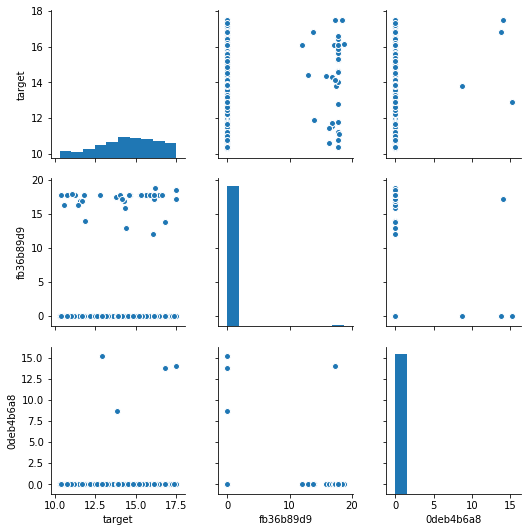

In [124]:
rand_cols = [str(n) for n in np.arange(0, df.shape[1]-3, 12)]
sns.pairplot(df[['target','fb36b89d9','0deb4b6a8']])





In [128]:
garbages = []
for col in df.columns:
    if df[col].std() == 0:
        garbages.append(col)

In [130]:
def drop_sparse(train, test):
    flist = [x for x in train.columns if not x in ['ID','target']]
    for f in flist:
        if len(np.unique(train[f]))<2:
            train.drop(f, axis=1, inplace=True)
            test.drop(f, axis=1, inplace=True)
    return train, test

In [131]:
%%time
gc.co

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

/home/zhangyong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/zhangyong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/zhangyong/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


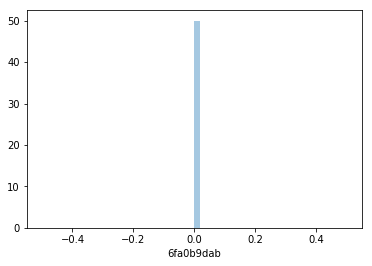

In [127]:
sns.distplot(df['6fa0b9dab'])

In [134]:
X_train = dat.drop(["ID", "target"], axis=1)
y_train = np.log1p(dat["target"].values)

X_test = test.drop(["ID"], axis=1)

In [136]:
flist = [x for x in X_train.columns if not x in ['ID','target']]
n_components = 20
flist_pca = []
pca = PCA(n_components=n_components)
x_train_projected = pca.fit_transform(normalize(X_train[flist], axis=0))
x_test_projected = pca.transform(normalize(X_test[flist], axis=0))
for npca in range(0, n_components):
    X_train.insert(1, 'PCA_'+str(npca+1), x_train_projected[:, npca])
    X_test.insert(1, 'PCA_'+str(npca+1), x_test_projected[:, npca])
    flist_pca.append('PCA_'+str(npca+1))
print(flist_pca)

['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14', 'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20']


In [159]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3567, 4991) (3567,)
(892, 4991) (892,)


In [160]:
lgtrain = lgb.Dataset(X_train, label=y_train)
lgval = lgb.Dataset(X_test, label=y_test)
eval_result = {}

In [161]:
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
lg_model = lgb.train(params, lgtrain, 1000,
                     valid_sets=[lgtrain, lgval], early_stopping_rounds=100, 
                     verbose_eval=200, evals_result=eval_result)

Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 5.98862e+06	valid_1's rmse: 6.82929e+06
[400]	training's rmse: 5.15416e+06	valid_1's rmse: 6.77026e+06
Early stopping, best iteration is:
[421]	training's rmse: 5.08825e+06	valid_1's rmse: 6.76845e+06


In [163]:
tes = lg_model.predict(X_test)

In [174]:
rmsle(tes, y_test.values)

/home/zhangyong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


nan

In [171]:
outs = lg_model.predict(tess)

(892,)

In [ ]:
out = pd.DataFrame(test, columns=['ID'])
out['target'] = lg_model.predict(test.drop(['ID'], axis=1))